<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [23]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [34]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [35]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [36]:
boston_df=pd.read_csv(boston_url)
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


#### Add your code below following the instructions given in the course to complete the peer graded assignment


<AxesSubplot:xlabel='MEDV'>

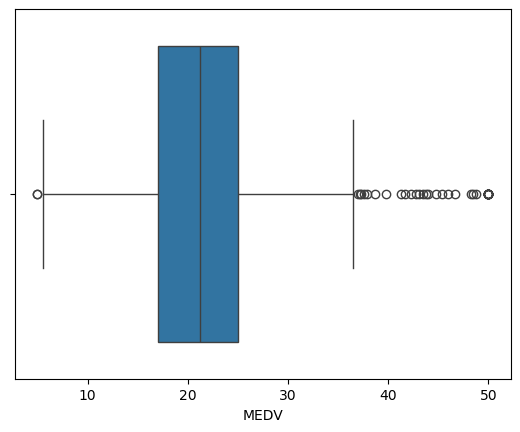

In [32]:

# Create a boxplot
sns.boxplot(x="MEDV", data=boston_df)


Text(0.5, 1.0, 'Bar Plot of Charles River Variable (CHAS)')

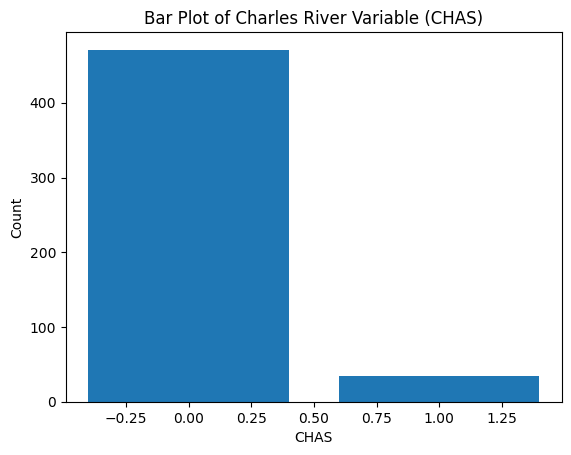

In [37]:
#create the bar plot for the CHAS variable
chas_counts = boston_df['CHAS'].value_counts()

plt.bar(chas_counts.index, chas_counts.values)
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.title('Bar Plot of Charles River Variable (CHAS)')


Text(0.5, 0.98, '')

<Figure size 1000x600 with 0 Axes>

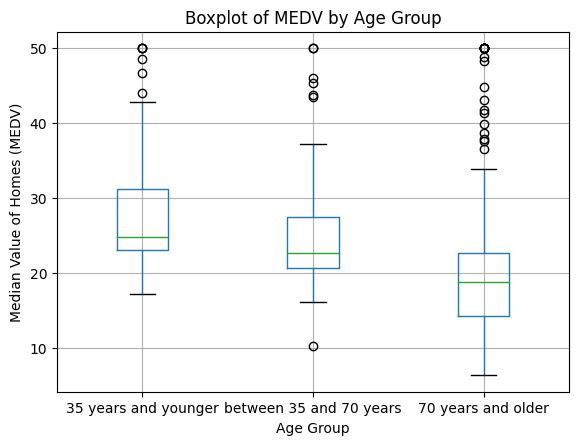

In [38]:
# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create the boxplot
plt.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='Age_Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Boxplot of MEDV by Age Group')
plt.suptitle('')  


<function matplotlib.pyplot.show(close=None, block=None)>

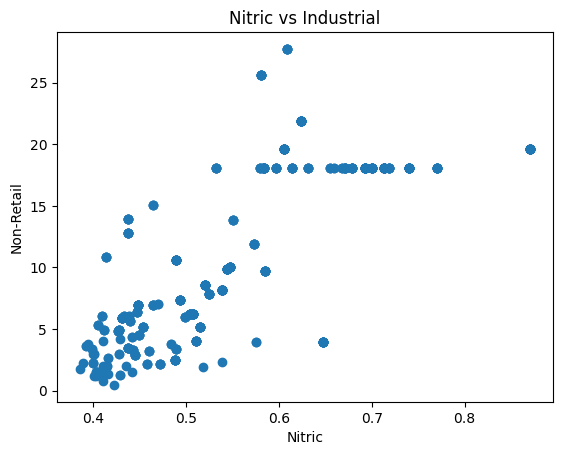

In [40]:

#create Scatterplot
plt.scatter(boston_df['NOX'], boston_df['INDUS'])

plt.xlabel('Nitric')
plt.ylabel('Non-Retail')
plt.title('Nitric vs Industrial')
plt.show

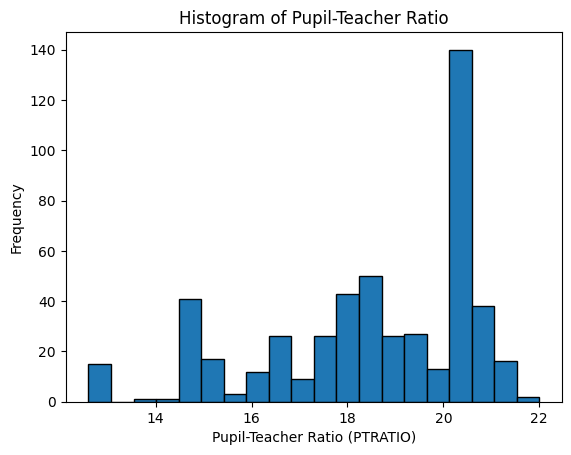

In [41]:
#Create Histogram
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='k')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.show()

In [43]:
import pandas as pd
import scipy.stats as stats
from js import fetch
import io

# Separate the data based on CHAS (Charles River variable)
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River.")



t-statistic: -3.996437466090509
p-value: 7.390623170519905e-05
There is a significant difference in the median value of houses bounded by the Charles River.


In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from js import fetch
import io

# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Perform the ANOVA test
model = ols('MEDV ~ Age_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Interpretation
if anova_table['PR(>F)'][0] < 0.05:
    print("There is a significant difference in the median values of houses for each age group.")
else:
    print("There is no significant difference in the median values of houses for each age group.")


                 sum_sq     df         F        PR(>F)
Age_Group   4339.074039    2.0  30.56684  3.435569e-13
Residual   32649.336069  460.0       NaN           NaN


<ipython-input-44-b5e6dd3ed42a>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


There is a significant difference in the median values of houses for each age group.


In [46]:
import pandas as pd
import numpy as np
from js import fetch
import io

# Calculate the Pearson correlation coefficient
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.763651446920914


Can conclude there is a strong positive linear correlation 

In [47]:
import pandas as pd
import statsmodels.api as sm
from js import fetch
import io

# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        12:44:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Intercept (const): 18.3901. This is the estimated median value of owner-occupied homes when the weighted distance to employment centers (DIS) is zero.

Coefficient for DIS: 1.0916. For each additional unit increase in the weighted distance to employment centers, the median value of homes is expected to increase by approximately 1.0916 units.

P-value for DIS: 0.000. Since this is less than 0.05, the relationship between DIS and MEDV is statistically significant.

Interpretation
The results indicate that increasing the distance to employment centers is associated with an increase in the median value of homes. The R-squared value (0.062) suggests that around 6.2% of the variability in the median value of homes is explained by the weighted distance to employment centers. This is relatively low, indicating there are other factors at play that also influence home values.